In [5]:
from astropy.io import ascii
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = ascii.read('global_SF6_MM.dat')
data

SF6ottoyr,SF6ottomon,SF6ottoNHm,SF6ottoNHsd,SF6ottoSHm,SF6ottoSHsd,SF6ottoGLm,SF6ottoGLsd
int32,int32,float64,float64,float64,float64,float64,float64
1995,1,3.533,0.029,3.207,0.125,3.37,0.064
1995,2,3.512,0.154,3.282,0.193,3.397,0.122
1995,3,3.558,0.159,3.244,0.12,3.401,0.1
1995,4,3.618,0.09,3.287,0.17,3.453,0.094
1995,5,3.626,0.133,3.308,0.139,3.467,0.099
1995,6,3.551,0.119,3.297,0.112,3.424,0.081
1995,7,3.677,0.093,3.262,0.124,3.47,0.078
1995,8,3.675,0.211,3.259,0.191,3.467,0.143
1995,9,3.626,0.063,3.346,0.064,3.486,0.043


In [8]:
df = data.to_pandas()[['SF6ottoyr','SF6ottomon','SF6ottoGLm','SF6ottoGLsd']].dropna()
df

,SF6ottoyr,SF6ottomon,SF6ottoGLm,SF6ottoGLsd
0,1995,1,3.370,0.064
1,1995,2,3.397,0.122
2,1995,3,3.401,0.100
3,1995,4,3.453,0.094
4,1995,5,3.467,0.099
...,...,...,...,...
212,2012,9,7.631,0.019
213,2012,10,7.668,0.026
214,2012,11,7.695,0.022
215,2012,12,7.730,0.022


In [9]:
df['date'] = df['SF6ottoyr'].astype(str)+'.'+df['SF6ottomon'].astype(str)
df

,SF6ottoyr,SF6ottomon,SF6ottoGLm,SF6ottoGLsd,date
0,1995,1,3.370,0.064,1995.1
1,1995,2,3.397,0.122,1995.2
2,1995,3,3.401,0.100,1995.3
3,1995,4,3.453,0.094,1995.4
4,1995,5,3.467,0.099,1995.5
...,...,...,...,...,...
212,2012,9,7.631,0.019,2012.9
213,2012,10,7.668,0.026,2012.10
214,2012,11,7.695,0.022,2012.11
215,2012,12,7.730,0.022,2012.12


<ErrorbarContainer object of 3 artists>

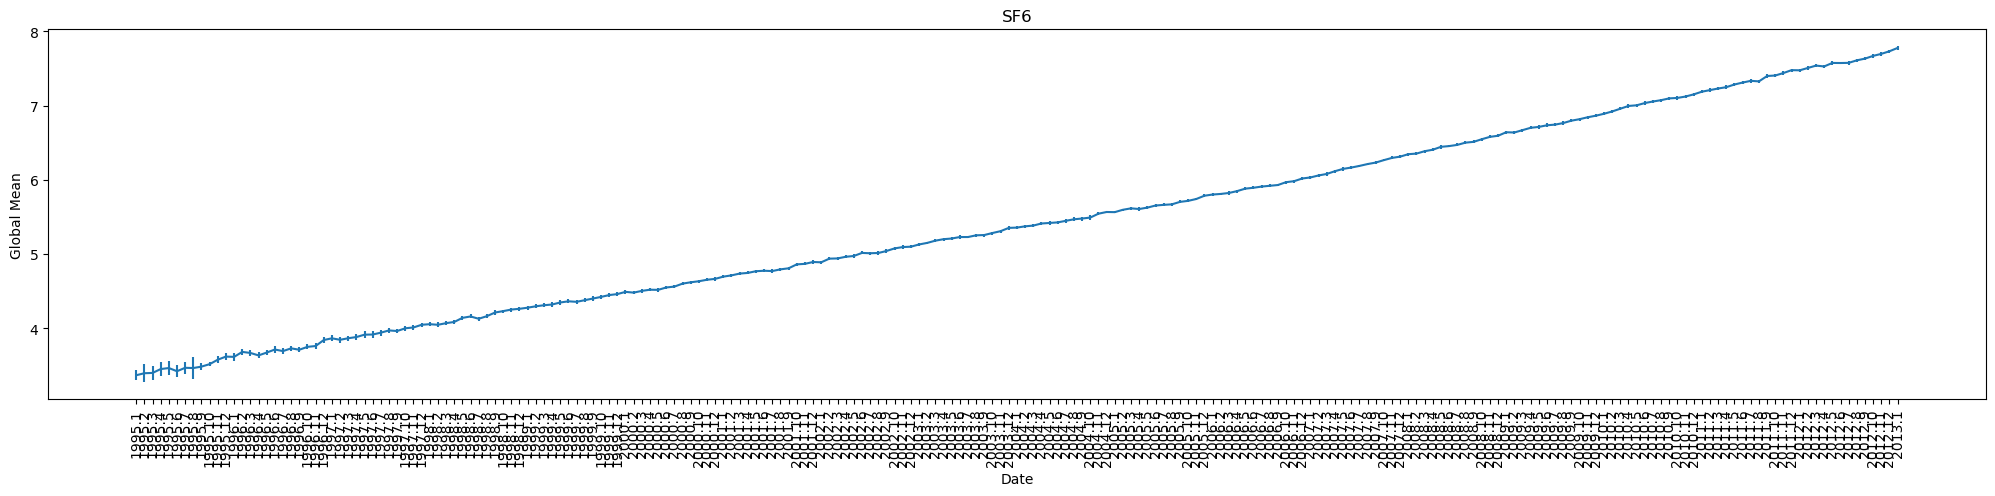

In [10]:
plt.figure().set_figwidth(25)
plt.xlabel('Date')
plt.ylabel('Global Mean')
plt.title('SF6')
plt.xticks(rotation=90)
plt.errorbar(df['date'],df['SF6ottoGLm'],yerr=df['SF6ottoGLsd'])

In [26]:
x = np.linspace(0,216,217)
z = np.polyfit(x, df['SF6ottoGLm'],1)
print(z)
l = []
for i in range(217):
    l.append(z[0]*i+z[1])

[0.01987584 3.28442794]


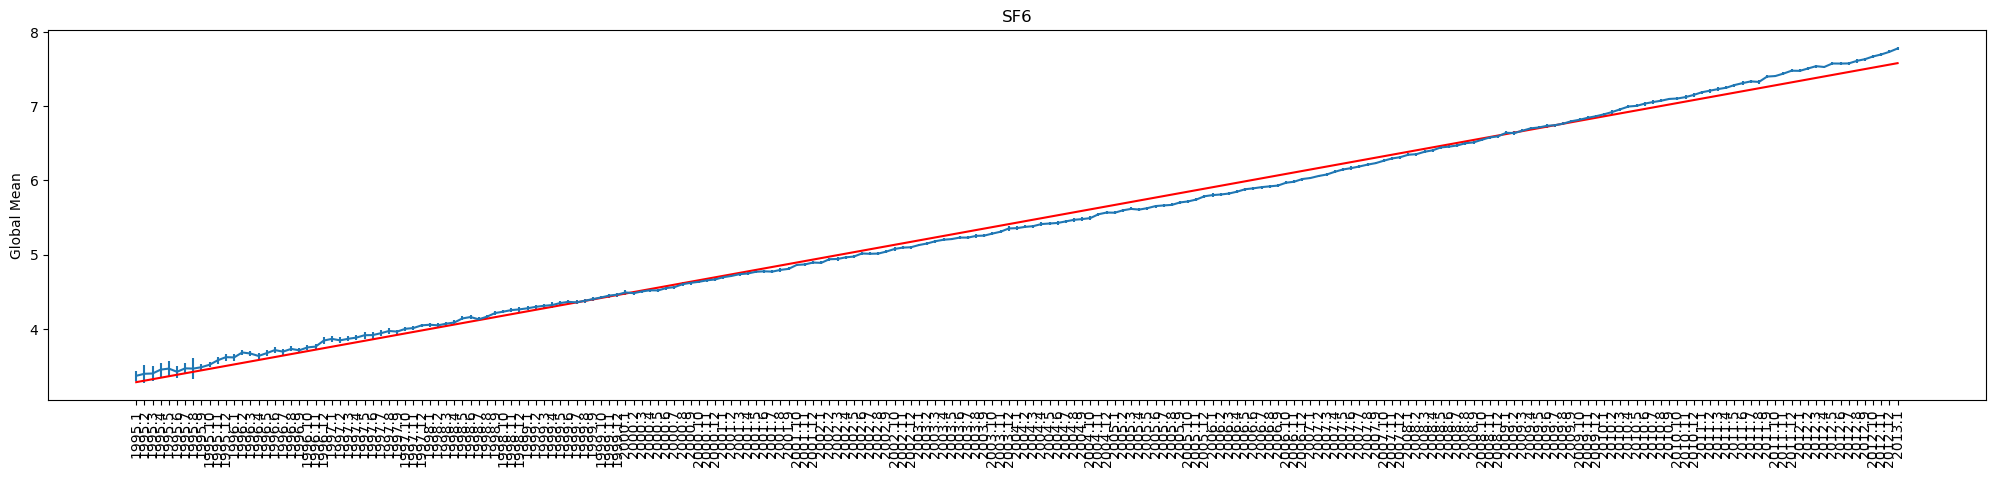

In [18]:
plt.figure().set_figwidth(25)
plt.ylabel('Global Mean')
plt.title('SF6')
plt.errorbar(df['date'],df['SF6ottoGLm'],yerr=df['SF6ottoGLsd'])
plt.xticks(rotation=90)
plt.plot(x,l,'r')

In [27]:
def model(x, m, c):
    return m*x+c

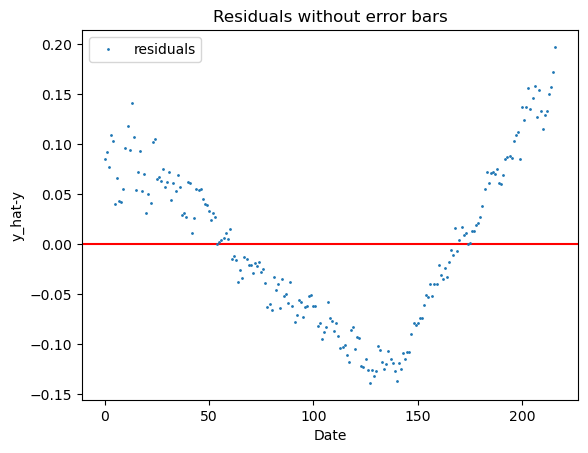

In [38]:
x_dat=x
y_dat=df['SF6ottoGLm']

# Predicted y values from the fit to model 
y_pred = model(x_dat, *z)

# Proportional model residuals defined
r = y_dat - y_pred

# Residuals without error bars
plt.errorbar(x_dat, r, yerr=None, fmt='o', ms=1, label='residuals')
plt.axhline(color='r') # 0 line for reference

# Axes label and title
plt.title("Residuals without error bars")
plt.xlabel("Date")
plt.ylabel("y_hat-y")
plt.legend()
plt.show()

In [34]:
def chisq(predicted, observed, errors):
    res = observed-predicted
    norm_res = res / errors 
    return np.sum(norm_res**2)
y_err=df['SF6ottoGLsd']
chi2 = chisq(y_pred, y_dat, y_err)

print('χ2 ={0:.3f}'.format (chi2))

print('χ2 =', chi2) #unformatted, as an example

# Reduced chisq
nu=len(x_dat)-2
chi2_red=chi2/nu
print(chi2_red)

χ2 =2734.475
χ2 = 2734.475379452992
12.71849013699066


In [35]:
#The linear model seems appropriate at first, but the residuals plot suggests otherwise, and the chi-squared value is large
print('y=0.01987584*x+3.28442794')

y=0.01987584*x+3.28442794
